In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 线搜索方法

In [2]:
def unconstrained_optimize(f, x0, epsilon=1e-8, max_iter=1000):
    x = np.zeros((max_iter+1, x0.shape[0]))  # 定义 x 初始存储空间

    x[0] = x0
    for k in range(max_iter):
        d = search_desc_direction(f, x[k], ...)  # 确定下降方向

        def phi(alpha): return f(x[k] + alpha * d)
        alpha = search_step_length(phi, ...)  # 确定最优步长

        x[k+1] = x[k] + alpha * d

        # if np.linalg.norm(g(x[k+1])) <= epsilon:
        # if f(x[k]) - f(x[k+1]) <= epsilon:
        if np.linalg.norm(x[k] - x[k+1]) <= epsilon:
            break

    return x[k+1], f(x[k+1])

## 精确线搜索方法

为了更好地说明算法，我们考虑书中一道习题$$\phi(\alpha)=1-\alpha\mathrm{exp}\left(-\alpha^{2}\right)$$

In [3]:
def phi(alpha):
    return 1 - alpha * np.exp(- alpha ** 2)

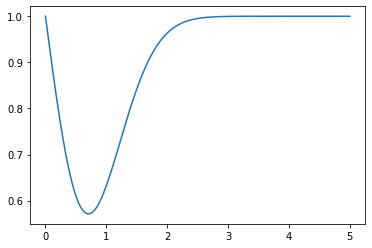

In [4]:
alphas = np.linspace(0, 5, 1000)
phis = phi(alphas)

plt.plot(alphas, phis)
plt.show()
# plt.savefig("./figures/exercise-2.8.png", dpi=300)

### 确定步长搜索区间

In [5]:
def search_unimodal_interval(phi, alpha0, gamma=0.1, t=2, max_iter=1000):
    alphas = np.zeros(max_iter + 1)

    alphas[0] = alpha0
    for i in range(max_iter):
        alphas[i+1] = alphas[i] + gamma

        print("Iter %02d: alpha %.2f, phi %.2f, gamma %.2f" %
              (i+1, alphas[i+1], phi(alphas[i+1]), gamma))
        if phi(alphas[i+1]) >= phi(alphas[i]) or alphas[i+1] <= 0:
            if i == 0:
                gamma = -gamma
                alpha = alphas[i+1]
            else:
                break
        else:
            gamma = t * gamma
            alpha = alphas[i]
            alphas[i] = alphas[i+1]

    return min(alpha, alphas[i+1]), max(alpha, alphas[i+1])

In [6]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))

Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]


In [7]:
a, b = search_unimodal_interval(phi, 1)
print("Final interval is [%.2f, %.2f]" % (a, b))

Iter 01: alpha 1.10, phi 0.67, gamma 0.10
Iter 02: alpha 1.00, phi 0.63, gamma -0.10
Iter 03: alpha 0.80, phi 0.58, gamma -0.20
Iter 04: alpha 0.40, phi 0.66, gamma -0.40
Final interval is [0.40, 1.00]


In [8]:
def search_unimodal_interval_adv(phi, alpha0, gamma=0.1, t=2, max_iter=1000):
    alpha_old = alpha0
    phi_alpha_old = phi(alpha_old)
    for i in range(max_iter):
        alpha = alpha_old + gamma
        phi_alpha = phi(alpha)

        if phi_alpha >= phi_alpha_old or alpha <= 0:
            if i == 0:
                gamma = -gamma
                alpha_other = alpha
            else:
                break
        else:
            gamma = t * gamma
            alpha_other = alpha_old
        
        alpha_old = alpha
        phi_alpha_old = phi_alpha

    return min(alpha_other, alpha), max(alpha_other, alpha)

In [9]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))

Final interval is [0.30, 1.50]


In [10]:
a, b = search_unimodal_interval_adv(phi, 1)
print("Final interval is [%.2f, %.2f]" % (a, b))

Final interval is [0.40, 1.00]


### 缩小步长搜索区间

In [11]:
def search_step_length_gold(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    a, b = np.empty(max_iter + 1), np.empty(max_iter + 1)

    a[0], b[0] = a0, b0
    tau = (np.sqrt(5) - 1) / 2
    for i in range(max_iter):
        a_l = a[i] + (1 - tau) * (b[i] - a[i])
        a_r = a[i] + tau * (b[i] - a[i])
        if phi(a_l) < phi(a_r):
            a[i+1], b[i+1] = a[i], a_r
        else:
            a[i+1], b[i+1] = a_l, b[i]

        print("Iter %02d: a (%.2f, %.2f), a_l (%.2f, %.2f), a_r (%.2f, %.2f), b (%.2f, %.2f)" % (
            i, a[i], phi(a[i]), a_l, phi(a_l), a_r, phi(a_r), b[i], phi(b[i])))
        if b[i+1] - a[i+1] < epsilon:
            break
    return (a[i+1] + b[i+1]) / 2


In [29]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_gold(phi, a, b, epsilon=1e-8)
print("Optimal alpha is %.8f" % (alpha))


Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]
**************************************************
Iter 00: a (0.30, 0.73), a_l (0.76, 0.57), a_r (1.04, 0.65), b (1.50, 0.84)
Iter 01: a (0.30, 0.73), a_l (0.58, 0.58), a_r (0.76, 0.57), b (1.04, 0.65)
Iter 02: a (0.58, 0.58), a_l (0.76, 0.57), a_r (0.87, 0.59), b (1.04, 0.65)
Iter 03: a (0.58, 0.58), a_l (0.69, 0.57), a_r (0.76, 0.57), b (0.87, 0.59)
Iter 04: a (0.58, 0.58), a_l (0.65, 0.57), a_r (0.69, 0.57), b (0.76, 0.57)
Iter 05: a (0.65, 0.57), a_l (0.69, 0.57), a_r (0.72, 0.57), b (0.76, 0.57)
Iter 06: a (0.69, 0.57), a_l (0.72, 0.57), a_r (0.73, 0.57), b (0.76, 0.57)
Iter 07: a (0.69, 0.57), a_l (0.71, 0.57), a_r (0.72, 0.57), b (0.73, 0.57)
Iter 08: a (0.69, 0.57), a_l (0.70, 0.57), a_r (0.71, 0.57), b (0.72, 0.57)
Iter 09: a (0.70, 0.57), a_l (0.71, 0.57), a_r (0.71, 0.57), b (0.

In [30]:
def search_step_length_gold_adv(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    tau = (np.sqrt(5) - 1) / 2
    a, b = a0, b0
    phi_a, phi_b = phi(a), phi(b)
    for i in range(max_iter):
        a_l = a + (1 - tau) * (b - a)
        a_r = a + tau * (b - a)
        
        # !TODO
        if phi(a_l) < phi(a_r):
            a, b = a, a_r
        else:
            a, b = a_l, b
        if b - a < epsilon:
            break
    return (a + b) / 2


In [32]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_gold_adv(phi, a, b, epsilon=1e-8)
print("Optimal alpha is %.8f" % (alpha))

Final interval is [0.30, 1.50]
**************************************************
Optimal alpha is 0.70710679


In [33]:
def search_step_length_poly32(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    a, b, c = np.empty(max_iter + 1), np.empty(max_iter + 1), np.empty(max_iter + 1)

    a[0], c[0], b[0] = a0, (a0 + b0) / 2, b0
    for i in range(max_iter):
        c1 = (phi(c[i]) - phi(a[i])) / (c[i] - a[i])
        c2 = ((phi(b[i]) - phi(a[i])) / (b[i] - a[i]) - c1) / (b[i] - c[i])
        alpha_p = 0.5 * (a[i] + b[i] - c1 / c2)
        if phi(c[i]) <= phi(alpha_p):
            if c[i] <= alpha_p:
                a[i+1], c[i+1], b[i+1] = a[i], c[i], alpha_p
            else:
                a[i+1], c[i+1], b[i+1] = alpha_p, c[i], b[i]
        else:
            if c[i] <= alpha_p:
                a[i+1], c[i+1], b[i+1] = c[i], alpha_p, b[i]
            else:
                a[i+1], c[i+1], b[i+1] = a[i], alpha_p, c[i]

        print("Iter %02d: (%.2f, %.2f, %.2f), optimal alpha %.2f" %
              (i, a[i+1], c[i+1], b[i+1], alpha_p))
        if c[i+1] - a[i+1] < epsilon:
            break

    return alpha_p


In [34]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_poly32(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))


Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]
**************************************************
Iter 00: (0.30, 0.90, 1.11), optimal alpha 1.11
Iter 01: (0.30, 0.85, 0.90), optimal alpha 0.85
Iter 02: (0.30, 0.75, 0.85), optimal alpha 0.75
Iter 03: (0.30, 0.75, 0.77), optimal alpha 0.77
Iter 04: (0.30, 0.72, 0.75), optimal alpha 0.72
Iter 05: (0.30, 0.72, 0.73), optimal alpha 0.73
Iter 06: (0.30, 0.71, 0.72), optimal alpha 0.71
Iter 07: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 08: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 09: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 10: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 11: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 12: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 13: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 14: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 15: (0.30, 0.71, 0.71), o

In [17]:
def search_step_length_poly32_adv(phi, a0, b0, epsilon=1e-8, max_iter=1000):

    a, c, b = a0, (a0 + b0) / 2, b0
    phi_a, phi_c, phi_b = phi(a), phi(c), phi(b)
    for i in range(max_iter):
        c1 = (phi_c - phi_a) / (c - a)
        c2 = ((phi_b - phi_a) / (b - a) - c1) / (b - c)
        alpha_p = 0.5 * (a + b - c1 / c2)
        phi_p = phi(alpha_p)
        if phi_c <= phi_p:
            if c <= alpha_p:
                a, c, b = a, c, alpha_p
                phi_a, phi_c, phi_b = phi_a, phi_c, phi_p
            else:
                a, c, b = alpha_p, c, b
                phi_a, phi_c, phi_b = phi_p, phi_c, phi_b
        else:
            if c <= alpha_p:
                a, c, b = c, alpha_p, b
                phi_a, phi_c, phi_b = phi_c, phi_p, phi_b
            else:
                a, c, b = a, alpha_p, c
                phi_a, phi_c, phi_b = phi_a, phi_p, phi_c

        if c - a < epsilon:
            break

    return alpha_p

In [18]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_poly32_adv(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))

Final interval is [0.30, 1.50]
**************************************************
Optimal alpha is 0.71


### 牛顿切线法

In [37]:
def search_step_length_newton(phi, phi_grad, phi_hess, alpha0, epsilon=1e-8, max_iter=1000):
    alpha = np.empty(max_iter + 1)

    alpha[0] = alpha0
    for i in range(max_iter):
        alpha[i+1] = alpha[i] - phi_grad(alpha[i]) / phi_hess(alpha[i])

        print("Iter %02d: alpha %.8f" % (i, alpha[i+1]))
        if abs(alpha[i+1] - alpha[i]) < epsilon:
            break

    return alpha[i+1]


In [38]:
def search_step_length_newton_adv(phi, phi_grad, phi_hess, alpha0, epsilon=1e-8, max_iter=1000):
    alpha_old = alpha0
    for i in range(max_iter):
        alpha = alpha_old - phi_grad(alpha_old) / phi_hess(alpha_old)

        if abs(alpha - alpha_old) < epsilon:
            break
        alpha_old = alpha

    return alpha


容易得到
$$\phi^{\prime}\left(\alpha\right)=\left(2\alpha^{2}-1\right)e^{-\alpha^{2}}$$
$$\phi^{\prime\prime}\left(\alpha\right)=\left(-4\alpha^{3}+6\alpha\right)e^{-\alpha^{2}}$$

In [39]:
def phi_grad(alpha):
    return (2 * alpha ** 2 - 1) * np.exp(- alpha ** 2)


def phi_hess(alpha):
    return (- 4 * alpha ** 3 + 6 * alpha) * np.exp(- alpha ** 2)


In [40]:
alpha = search_step_length_newton(phi, phi_grad, phi_hess, 1, epsilon=1e-8)
print("Optimal alpha is %.8f" % (alpha))

Iter 00: alpha 0.50000000
Iter 01: alpha 0.70000000
Iter 02: alpha 0.70707214
Iter 03: alpha 0.70710678
Iter 04: alpha 0.70710678
Optimal alpha is 0.70710678


In [42]:
alpha = search_step_length_newton_adv(phi, phi_grad, phi_hess, 1, epsilon=1e-8)
print("Optimal alpha is %.8f" % (alpha))

Optimal alpha is 0.70710678


## 线搜索方法实例

考虑经典的 RosenBrock 函数
$$
f(x, y)=100\left(y-x^{2}\right)^{2}+(1-x)^{2}
$$
并以其负梯度方向作为下降方向
$$
-\nabla f=-\left(\begin{array}{c}
400 x^{3}-400 x y+2 x-2 \\
200\left(y-x^{2}\right)
\end{array}\right)
$$

In [24]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2) ** 2 + (1 - x[0]) ** 2

In [25]:
def search_desc_direction_rosenbrock(x):
    return - np.array([
        400 * x[0] ** 3 - 400 * x[0] * x[1] + 2 * x[0] - 2,
        200 * (x[1] - x[0]**2)
    ])


In [46]:
def unconstrained_optimize(f, x0, epsilon=1e-6, max_iter=1000):
    x_old = x0
    for i in range(max_iter):
        d = search_desc_direction_rosenbrock(x_old)  # 确定下降方向

        def phi(alpha): return f(x_old + alpha * d)
        a, b = search_unimodal_interval_adv(phi, 2)
        alpha = search_step_length_gold_adv(phi, a, b)  # 确定最优步长

        x = x_old + alpha * d

        print("Iter %d: x (%.2f, %.2f), f %.2f" % (i, x[0], x[1], f(x)))
        # if np.linalg.norm(g(x)) <= epsilon:
        # if f(x_old) - f(x) <= epsilon:
        if np.linalg.norm(x_old - x) <= epsilon:
            break
        x_old = x
        

    return x, f(x)


In [47]:
x, fval = unconstrained_optimize(rosenbrock, np.array([0, 0]), max_iter=5000)


Iter 0: x (0.16, 0.00), f 0.77
Iter 1: x (0.16, 0.03), f 0.70
Iter 2: x (0.21, 0.03), f 0.66
Iter 3: x (0.21, 0.04), f 0.62
Iter 4: x (0.25, 0.04), f 0.59
Iter 5: x (0.25, 0.06), f 0.57
Iter 6: x (0.27, 0.06), f 0.55
Iter 7: x (0.27, 0.07), f 0.53
Iter 8: x (0.29, 0.07), f 0.52
Iter 9: x (0.29, 0.09), f 0.50
Iter 10: x (0.31, 0.09), f 0.49
Iter 11: x (0.31, 0.10), f 0.47
Iter 12: x (0.33, 0.10), f 0.46
Iter 13: x (0.33, 0.11), f 0.45
Iter 14: x (0.34, 0.11), f 0.44
Iter 15: x (0.34, 0.12), f 0.43
Iter 16: x (0.35, 0.12), f 0.42
Iter 17: x (0.35, 0.13), f 0.42
Iter 18: x (0.37, 0.13), f 0.41
Iter 19: x (0.37, 0.13), f 0.40
Iter 20: x (0.38, 0.13), f 0.39
Iter 21: x (0.38, 0.14), f 0.39
Iter 22: x (0.39, 0.14), f 0.38
Iter 23: x (0.39, 0.15), f 0.37
Iter 24: x (0.40, 0.15), f 0.37
Iter 25: x (0.40, 0.16), f 0.36
Iter 26: x (0.41, 0.16), f 0.36
Iter 27: x (0.41, 0.17), f 0.35
Iter 28: x (0.42, 0.17), f 0.35
Iter 29: x (0.42, 0.17), f 0.34
Iter 30: x (0.42, 0.17), f 0.34
Iter 31: x (0.42, 

Iter 515: x (0.84, 0.71), f 0.03
Iter 516: x (0.84, 0.71), f 0.03
Iter 517: x (0.84, 0.71), f 0.03
Iter 518: x (0.84, 0.71), f 0.03
Iter 519: x (0.84, 0.71), f 0.03
Iter 520: x (0.84, 0.71), f 0.03
Iter 521: x (0.84, 0.71), f 0.03
Iter 522: x (0.84, 0.71), f 0.02
Iter 523: x (0.84, 0.71), f 0.02
Iter 524: x (0.84, 0.71), f 0.02
Iter 525: x (0.84, 0.71), f 0.02
Iter 526: x (0.84, 0.71), f 0.02
Iter 527: x (0.84, 0.71), f 0.02
Iter 528: x (0.84, 0.71), f 0.02
Iter 529: x (0.84, 0.71), f 0.02
Iter 530: x (0.84, 0.71), f 0.02
Iter 531: x (0.84, 0.71), f 0.02
Iter 532: x (0.85, 0.71), f 0.02
Iter 533: x (0.85, 0.71), f 0.02
Iter 534: x (0.85, 0.71), f 0.02
Iter 535: x (0.85, 0.72), f 0.02
Iter 536: x (0.85, 0.72), f 0.02
Iter 537: x (0.85, 0.72), f 0.02
Iter 538: x (0.85, 0.72), f 0.02
Iter 539: x (0.85, 0.72), f 0.02
Iter 540: x (0.85, 0.72), f 0.02
Iter 541: x (0.85, 0.72), f 0.02
Iter 542: x (0.85, 0.72), f 0.02
Iter 543: x (0.85, 0.72), f 0.02
Iter 544: x (0.85, 0.72), f 0.02
Iter 545: 

Iter 920: x (0.92, 0.84), f 0.01
Iter 921: x (0.92, 0.84), f 0.01
Iter 922: x (0.92, 0.84), f 0.01
Iter 923: x (0.92, 0.84), f 0.01
Iter 924: x (0.92, 0.84), f 0.01
Iter 925: x (0.92, 0.84), f 0.01
Iter 926: x (0.92, 0.84), f 0.01
Iter 927: x (0.92, 0.84), f 0.01
Iter 928: x (0.92, 0.84), f 0.01
Iter 929: x (0.92, 0.84), f 0.01
Iter 930: x (0.92, 0.84), f 0.01
Iter 931: x (0.92, 0.84), f 0.01
Iter 932: x (0.92, 0.84), f 0.01
Iter 933: x (0.92, 0.84), f 0.01
Iter 934: x (0.92, 0.84), f 0.01
Iter 935: x (0.92, 0.84), f 0.01
Iter 936: x (0.92, 0.84), f 0.01
Iter 937: x (0.92, 0.84), f 0.01
Iter 938: x (0.92, 0.84), f 0.01
Iter 939: x (0.92, 0.84), f 0.01
Iter 940: x (0.92, 0.84), f 0.01
Iter 941: x (0.92, 0.84), f 0.01
Iter 942: x (0.92, 0.84), f 0.01
Iter 943: x (0.92, 0.84), f 0.01
Iter 944: x (0.92, 0.84), f 0.01
Iter 945: x (0.92, 0.85), f 0.01
Iter 946: x (0.92, 0.85), f 0.01
Iter 947: x (0.92, 0.85), f 0.01
Iter 948: x (0.92, 0.85), f 0.01
Iter 949: x (0.92, 0.85), f 0.01
Iter 950: 

Iter 1239: x (0.95, 0.90), f 0.00
Iter 1240: x (0.95, 0.90), f 0.00
Iter 1241: x (0.95, 0.90), f 0.00
Iter 1242: x (0.95, 0.90), f 0.00
Iter 1243: x (0.95, 0.90), f 0.00
Iter 1244: x (0.95, 0.90), f 0.00
Iter 1245: x (0.95, 0.90), f 0.00
Iter 1246: x (0.95, 0.90), f 0.00
Iter 1247: x (0.95, 0.90), f 0.00
Iter 1248: x (0.95, 0.90), f 0.00
Iter 1249: x (0.95, 0.90), f 0.00
Iter 1250: x (0.95, 0.90), f 0.00
Iter 1251: x (0.95, 0.90), f 0.00
Iter 1252: x (0.95, 0.90), f 0.00
Iter 1253: x (0.95, 0.90), f 0.00
Iter 1254: x (0.95, 0.90), f 0.00
Iter 1255: x (0.95, 0.90), f 0.00
Iter 1256: x (0.95, 0.90), f 0.00
Iter 1257: x (0.95, 0.90), f 0.00
Iter 1258: x (0.95, 0.90), f 0.00
Iter 1259: x (0.95, 0.90), f 0.00
Iter 1260: x (0.95, 0.90), f 0.00
Iter 1261: x (0.95, 0.90), f 0.00
Iter 1262: x (0.95, 0.90), f 0.00
Iter 1263: x (0.95, 0.90), f 0.00
Iter 1264: x (0.95, 0.90), f 0.00
Iter 1265: x (0.95, 0.90), f 0.00
Iter 1266: x (0.95, 0.90), f 0.00
Iter 1267: x (0.95, 0.90), f 0.00
Iter 1268: x (

Iter 1588: x (0.97, 0.94), f 0.00
Iter 1589: x (0.97, 0.94), f 0.00
Iter 1590: x (0.97, 0.94), f 0.00
Iter 1591: x (0.97, 0.94), f 0.00
Iter 1592: x (0.97, 0.94), f 0.00
Iter 1593: x (0.97, 0.94), f 0.00
Iter 1594: x (0.97, 0.94), f 0.00
Iter 1595: x (0.97, 0.94), f 0.00
Iter 1596: x (0.97, 0.94), f 0.00
Iter 1597: x (0.97, 0.94), f 0.00
Iter 1598: x (0.97, 0.94), f 0.00
Iter 1599: x (0.97, 0.94), f 0.00
Iter 1600: x (0.97, 0.94), f 0.00
Iter 1601: x (0.97, 0.94), f 0.00
Iter 1602: x (0.97, 0.94), f 0.00
Iter 1603: x (0.97, 0.94), f 0.00
Iter 1604: x (0.97, 0.94), f 0.00
Iter 1605: x (0.97, 0.94), f 0.00
Iter 1606: x (0.97, 0.94), f 0.00
Iter 1607: x (0.97, 0.94), f 0.00
Iter 1608: x (0.97, 0.94), f 0.00
Iter 1609: x (0.97, 0.94), f 0.00
Iter 1610: x (0.97, 0.94), f 0.00
Iter 1611: x (0.97, 0.94), f 0.00
Iter 1612: x (0.97, 0.94), f 0.00
Iter 1613: x (0.97, 0.94), f 0.00
Iter 1614: x (0.97, 0.94), f 0.00
Iter 1615: x (0.97, 0.94), f 0.00
Iter 1616: x (0.97, 0.94), f 0.00
Iter 1617: x (

Iter 2025: x (0.98, 0.96), f 0.00
Iter 2026: x (0.98, 0.96), f 0.00
Iter 2027: x (0.98, 0.96), f 0.00
Iter 2028: x (0.98, 0.96), f 0.00
Iter 2029: x (0.98, 0.96), f 0.00
Iter 2030: x (0.98, 0.96), f 0.00
Iter 2031: x (0.98, 0.96), f 0.00
Iter 2032: x (0.98, 0.96), f 0.00
Iter 2033: x (0.98, 0.96), f 0.00
Iter 2034: x (0.98, 0.96), f 0.00
Iter 2035: x (0.98, 0.96), f 0.00
Iter 2036: x (0.98, 0.96), f 0.00
Iter 2037: x (0.98, 0.96), f 0.00
Iter 2038: x (0.98, 0.96), f 0.00
Iter 2039: x (0.98, 0.96), f 0.00
Iter 2040: x (0.98, 0.96), f 0.00
Iter 2041: x (0.98, 0.96), f 0.00
Iter 2042: x (0.98, 0.96), f 0.00
Iter 2043: x (0.98, 0.96), f 0.00
Iter 2044: x (0.98, 0.96), f 0.00
Iter 2045: x (0.98, 0.96), f 0.00
Iter 2046: x (0.98, 0.96), f 0.00
Iter 2047: x (0.98, 0.96), f 0.00
Iter 2048: x (0.98, 0.96), f 0.00
Iter 2049: x (0.98, 0.96), f 0.00
Iter 2050: x (0.98, 0.96), f 0.00
Iter 2051: x (0.98, 0.96), f 0.00
Iter 2052: x (0.98, 0.96), f 0.00
Iter 2053: x (0.98, 0.96), f 0.00
Iter 2054: x (

Iter 2354: x (0.99, 0.98), f 0.00
Iter 2355: x (0.99, 0.98), f 0.00
Iter 2356: x (0.99, 0.98), f 0.00
Iter 2357: x (0.99, 0.98), f 0.00
Iter 2358: x (0.99, 0.98), f 0.00
Iter 2359: x (0.99, 0.98), f 0.00
Iter 2360: x (0.99, 0.98), f 0.00
Iter 2361: x (0.99, 0.98), f 0.00
Iter 2362: x (0.99, 0.98), f 0.00
Iter 2363: x (0.99, 0.98), f 0.00
Iter 2364: x (0.99, 0.98), f 0.00
Iter 2365: x (0.99, 0.98), f 0.00
Iter 2366: x (0.99, 0.98), f 0.00
Iter 2367: x (0.99, 0.98), f 0.00
Iter 2368: x (0.99, 0.98), f 0.00
Iter 2369: x (0.99, 0.98), f 0.00
Iter 2370: x (0.99, 0.98), f 0.00
Iter 2371: x (0.99, 0.98), f 0.00
Iter 2372: x (0.99, 0.98), f 0.00
Iter 2373: x (0.99, 0.98), f 0.00
Iter 2374: x (0.99, 0.98), f 0.00
Iter 2375: x (0.99, 0.98), f 0.00
Iter 2376: x (0.99, 0.98), f 0.00
Iter 2377: x (0.99, 0.98), f 0.00
Iter 2378: x (0.99, 0.98), f 0.00
Iter 2379: x (0.99, 0.98), f 0.00
Iter 2380: x (0.99, 0.98), f 0.00
Iter 2381: x (0.99, 0.98), f 0.00
Iter 2382: x (0.99, 0.98), f 0.00
Iter 2383: x (

Iter 2769: x (0.99, 0.99), f 0.00
Iter 2770: x (0.99, 0.99), f 0.00
Iter 2771: x (0.99, 0.99), f 0.00
Iter 2772: x (0.99, 0.99), f 0.00
Iter 2773: x (0.99, 0.99), f 0.00
Iter 2774: x (0.99, 0.99), f 0.00
Iter 2775: x (0.99, 0.99), f 0.00
Iter 2776: x (0.99, 0.99), f 0.00
Iter 2777: x (0.99, 0.99), f 0.00
Iter 2778: x (0.99, 0.99), f 0.00
Iter 2779: x (0.99, 0.99), f 0.00
Iter 2780: x (0.99, 0.99), f 0.00
Iter 2781: x (0.99, 0.99), f 0.00
Iter 2782: x (0.99, 0.99), f 0.00
Iter 2783: x (0.99, 0.99), f 0.00
Iter 2784: x (0.99, 0.99), f 0.00
Iter 2785: x (0.99, 0.99), f 0.00
Iter 2786: x (0.99, 0.99), f 0.00
Iter 2787: x (0.99, 0.99), f 0.00
Iter 2788: x (0.99, 0.99), f 0.00
Iter 2789: x (0.99, 0.99), f 0.00
Iter 2790: x (0.99, 0.99), f 0.00
Iter 2791: x (0.99, 0.99), f 0.00
Iter 2792: x (0.99, 0.99), f 0.00
Iter 2793: x (0.99, 0.99), f 0.00
Iter 2794: x (0.99, 0.99), f 0.00
Iter 2795: x (0.99, 0.99), f 0.00
Iter 2796: x (0.99, 0.99), f 0.00
Iter 2797: x (0.99, 0.99), f 0.00
Iter 2798: x (

Iter 3148: x (1.00, 0.99), f 0.00
Iter 3149: x (1.00, 0.99), f 0.00
Iter 3150: x (1.00, 0.99), f 0.00
Iter 3151: x (1.00, 0.99), f 0.00
Iter 3152: x (1.00, 0.99), f 0.00
Iter 3153: x (1.00, 0.99), f 0.00
Iter 3154: x (1.00, 0.99), f 0.00
Iter 3155: x (1.00, 0.99), f 0.00
Iter 3156: x (1.00, 0.99), f 0.00
Iter 3157: x (1.00, 0.99), f 0.00
Iter 3158: x (1.00, 0.99), f 0.00
Iter 3159: x (1.00, 0.99), f 0.00
Iter 3160: x (1.00, 0.99), f 0.00
Iter 3161: x (1.00, 0.99), f 0.00
Iter 3162: x (1.00, 0.99), f 0.00
Iter 3163: x (1.00, 0.99), f 0.00
Iter 3164: x (1.00, 0.99), f 0.00
Iter 3165: x (1.00, 0.99), f 0.00
Iter 3166: x (1.00, 0.99), f 0.00
Iter 3167: x (1.00, 0.99), f 0.00
Iter 3168: x (1.00, 0.99), f 0.00
Iter 3169: x (1.00, 0.99), f 0.00
Iter 3170: x (1.00, 0.99), f 0.00
Iter 3171: x (1.00, 0.99), f 0.00
Iter 3172: x (1.00, 0.99), f 0.00
Iter 3173: x (1.00, 0.99), f 0.00
Iter 3174: x (1.00, 0.99), f 0.00
Iter 3175: x (1.00, 0.99), f 0.00
Iter 3176: x (1.00, 0.99), f 0.00
Iter 3177: x (

Iter 3495: x (1.00, 0.99), f 0.00
Iter 3496: x (1.00, 0.99), f 0.00
Iter 3497: x (1.00, 0.99), f 0.00
Iter 3498: x (1.00, 0.99), f 0.00
Iter 3499: x (1.00, 0.99), f 0.00
Iter 3500: x (1.00, 0.99), f 0.00
Iter 3501: x (1.00, 0.99), f 0.00
Iter 3502: x (1.00, 0.99), f 0.00
Iter 3503: x (1.00, 0.99), f 0.00
Iter 3504: x (1.00, 0.99), f 0.00
Iter 3505: x (1.00, 0.99), f 0.00
Iter 3506: x (1.00, 0.99), f 0.00
Iter 3507: x (1.00, 0.99), f 0.00
Iter 3508: x (1.00, 0.99), f 0.00
Iter 3509: x (1.00, 0.99), f 0.00
Iter 3510: x (1.00, 0.99), f 0.00
Iter 3511: x (1.00, 0.99), f 0.00
Iter 3512: x (1.00, 0.99), f 0.00
Iter 3513: x (1.00, 0.99), f 0.00
Iter 3514: x (1.00, 0.99), f 0.00
Iter 3515: x (1.00, 0.99), f 0.00
Iter 3516: x (1.00, 0.99), f 0.00
Iter 3517: x (1.00, 0.99), f 0.00
Iter 3518: x (1.00, 0.99), f 0.00
Iter 3519: x (1.00, 0.99), f 0.00
Iter 3520: x (1.00, 0.99), f 0.00
Iter 3521: x (1.00, 0.99), f 0.00
Iter 3522: x (1.00, 0.99), f 0.00
Iter 3523: x (1.00, 0.99), f 0.00
Iter 3524: x (

Iter 3824: x (1.00, 1.00), f 0.00
Iter 3825: x (1.00, 1.00), f 0.00
Iter 3826: x (1.00, 1.00), f 0.00
Iter 3827: x (1.00, 1.00), f 0.00
Iter 3828: x (1.00, 1.00), f 0.00
Iter 3829: x (1.00, 1.00), f 0.00
Iter 3830: x (1.00, 1.00), f 0.00
Iter 3831: x (1.00, 1.00), f 0.00
Iter 3832: x (1.00, 1.00), f 0.00
Iter 3833: x (1.00, 1.00), f 0.00
Iter 3834: x (1.00, 1.00), f 0.00
Iter 3835: x (1.00, 1.00), f 0.00
Iter 3836: x (1.00, 1.00), f 0.00
Iter 3837: x (1.00, 1.00), f 0.00
Iter 3838: x (1.00, 1.00), f 0.00
Iter 3839: x (1.00, 1.00), f 0.00
Iter 3840: x (1.00, 1.00), f 0.00
Iter 3841: x (1.00, 1.00), f 0.00
Iter 3842: x (1.00, 1.00), f 0.00
Iter 3843: x (1.00, 1.00), f 0.00
Iter 3844: x (1.00, 1.00), f 0.00
Iter 3845: x (1.00, 1.00), f 0.00
Iter 3846: x (1.00, 1.00), f 0.00
Iter 3847: x (1.00, 1.00), f 0.00
Iter 3848: x (1.00, 1.00), f 0.00
Iter 3849: x (1.00, 1.00), f 0.00
Iter 3850: x (1.00, 1.00), f 0.00
Iter 3851: x (1.00, 1.00), f 0.00
Iter 3852: x (1.00, 1.00), f 0.00
Iter 3853: x (

Iter 4159: x (1.00, 1.00), f 0.00
Iter 4160: x (1.00, 1.00), f 0.00
Iter 4161: x (1.00, 1.00), f 0.00
Iter 4162: x (1.00, 1.00), f 0.00
Iter 4163: x (1.00, 1.00), f 0.00
Iter 4164: x (1.00, 1.00), f 0.00
Iter 4165: x (1.00, 1.00), f 0.00
Iter 4166: x (1.00, 1.00), f 0.00
Iter 4167: x (1.00, 1.00), f 0.00
Iter 4168: x (1.00, 1.00), f 0.00
Iter 4169: x (1.00, 1.00), f 0.00
Iter 4170: x (1.00, 1.00), f 0.00
Iter 4171: x (1.00, 1.00), f 0.00
Iter 4172: x (1.00, 1.00), f 0.00
Iter 4173: x (1.00, 1.00), f 0.00
Iter 4174: x (1.00, 1.00), f 0.00
Iter 4175: x (1.00, 1.00), f 0.00
Iter 4176: x (1.00, 1.00), f 0.00
Iter 4177: x (1.00, 1.00), f 0.00
Iter 4178: x (1.00, 1.00), f 0.00
Iter 4179: x (1.00, 1.00), f 0.00
Iter 4180: x (1.00, 1.00), f 0.00
Iter 4181: x (1.00, 1.00), f 0.00
Iter 4182: x (1.00, 1.00), f 0.00
Iter 4183: x (1.00, 1.00), f 0.00
Iter 4184: x (1.00, 1.00), f 0.00
Iter 4185: x (1.00, 1.00), f 0.00
Iter 4186: x (1.00, 1.00), f 0.00
Iter 4187: x (1.00, 1.00), f 0.00
Iter 4188: x (

Iter 4545: x (1.00, 1.00), f 0.00
Iter 4546: x (1.00, 1.00), f 0.00
Iter 4547: x (1.00, 1.00), f 0.00
Iter 4548: x (1.00, 1.00), f 0.00
Iter 4549: x (1.00, 1.00), f 0.00
Iter 4550: x (1.00, 1.00), f 0.00
Iter 4551: x (1.00, 1.00), f 0.00
Iter 4552: x (1.00, 1.00), f 0.00
Iter 4553: x (1.00, 1.00), f 0.00
Iter 4554: x (1.00, 1.00), f 0.00
Iter 4555: x (1.00, 1.00), f 0.00
Iter 4556: x (1.00, 1.00), f 0.00
Iter 4557: x (1.00, 1.00), f 0.00
Iter 4558: x (1.00, 1.00), f 0.00
Iter 4559: x (1.00, 1.00), f 0.00
Iter 4560: x (1.00, 1.00), f 0.00
Iter 4561: x (1.00, 1.00), f 0.00
Iter 4562: x (1.00, 1.00), f 0.00
Iter 4563: x (1.00, 1.00), f 0.00
Iter 4564: x (1.00, 1.00), f 0.00
Iter 4565: x (1.00, 1.00), f 0.00
Iter 4566: x (1.00, 1.00), f 0.00
Iter 4567: x (1.00, 1.00), f 0.00
Iter 4568: x (1.00, 1.00), f 0.00
Iter 4569: x (1.00, 1.00), f 0.00
Iter 4570: x (1.00, 1.00), f 0.00
Iter 4571: x (1.00, 1.00), f 0.00
Iter 4572: x (1.00, 1.00), f 0.00
Iter 4573: x (1.00, 1.00), f 0.00
Iter 4574: x (

Iter 4974: x (1.00, 1.00), f 0.00
Iter 4975: x (1.00, 1.00), f 0.00
Iter 4976: x (1.00, 1.00), f 0.00
Iter 4977: x (1.00, 1.00), f 0.00
Iter 4978: x (1.00, 1.00), f 0.00
Iter 4979: x (1.00, 1.00), f 0.00
Iter 4980: x (1.00, 1.00), f 0.00
Iter 4981: x (1.00, 1.00), f 0.00
Iter 4982: x (1.00, 1.00), f 0.00
Iter 4983: x (1.00, 1.00), f 0.00
Iter 4984: x (1.00, 1.00), f 0.00
Iter 4985: x (1.00, 1.00), f 0.00
Iter 4986: x (1.00, 1.00), f 0.00
Iter 4987: x (1.00, 1.00), f 0.00
Iter 4988: x (1.00, 1.00), f 0.00
Iter 4989: x (1.00, 1.00), f 0.00
Iter 4990: x (1.00, 1.00), f 0.00
Iter 4991: x (1.00, 1.00), f 0.00
Iter 4992: x (1.00, 1.00), f 0.00
Iter 4993: x (1.00, 1.00), f 0.00
Iter 4994: x (1.00, 1.00), f 0.00
Iter 4995: x (1.00, 1.00), f 0.00
Iter 4996: x (1.00, 1.00), f 0.00
Iter 4997: x (1.00, 1.00), f 0.00
Iter 4998: x (1.00, 1.00), f 0.00
Iter 4999: x (1.00, 1.00), f 0.00


In [28]:
print(x, fval)

[0.99956324 0.99912667] 1.9075997174939612e-07
